<a href="https://colab.research.google.com/github/Muhammad-Usama-07/DeepLearning-Work/blob/main/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
from keras.datasets import imdb # Library for Loading Dataset
import numpy as np
from keras import models
from keras import layers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt 

# Loading IMDB Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

# Checking encoded data 

In [3]:
# Train data encoded like
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# Train labels encoded like in 0 or 1
train_labels[0]

1

# Decoding a reviews

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data (Encoding the integer sequences into a binary matrix)

In [10]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# Checking
x_train[0] 

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Defining Model

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

In [14]:
from keras import optimizers 
# Optimizer with custom learning rate
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Using Validation approach

In [15]:
# Seperating validation data from Training Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [16]:
# Seperating validation data from lable Data
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training Model

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 16s 58ms/step - loss: 0.5756 - acc: 0.7168 - val_loss: 0.3799 - val_acc: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3140 - acc: 0.9083 - val_loss: 0.3007 - val_acc: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2250 - acc: 0.9318 - val_loss: 0.3251 - val_acc: 0.8657
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1877 - acc: 0.9384 - val_loss: 0.2991 - val_acc: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1369 - acc: 0.9603 - val_loss: 0.2834 - val_acc: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1144 - acc: 0.9673 - val_loss: 0.2965 - val_acc: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0930 - acc: 0.9759 - val_loss: 0.3155 - val_acc: 0.8807
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0718 - 

In [18]:
# Extrating accuracy and loss variables
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plotting the training and validation loss

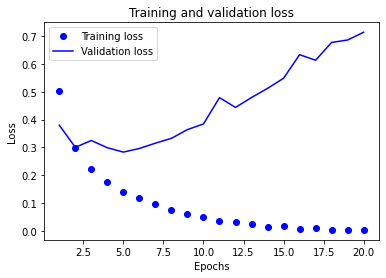

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()